# Supervised learning with Pandas and Scikit Learn

## Regression
First, let's get some data.

In [1]:
import pandas as pd

# File is in housing-all.csv
housingDF = pd.read_csv('../data/housing-all.csv')

housingDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_value
0,-117.62,33.43,23.0,4052.0,955.0,1950.0,859.0,4.0647,240600.0
1,-118.37,33.81,36.0,2031.0,339.0,817.0,337.0,5.1271,458300.0
2,-117.87,34.07,21.0,4723.0,882.0,2210.0,768.0,3.8167,258700.0
3,-117.37,33.19,33.0,2205.0,453.0,1138.0,439.0,2.8819,208600.0
4,-119.34,36.62,26.0,1922.0,339.0,1148.0,332.0,2.6058,92200.0


Suppose we want to predict `house_value` (that's our target or dependent variable (DV)). Let's start by segmenting our feature columns from the DV.

In [2]:
features = housingDF.drop('house_value', axis=1) # housingDF.drop(columns=['house_value'])
houseValues = housingDF['house_value']

features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.62,33.43,23.0,4052.0,955.0,1950.0,859.0,4.0647
1,-118.37,33.81,36.0,2031.0,339.0,817.0,337.0,5.1271
2,-117.87,34.07,21.0,4723.0,882.0,2210.0,768.0,3.8167
3,-117.37,33.19,33.0,2205.0,453.0,1138.0,439.0,2.8819
4,-119.34,36.62,26.0,1922.0,339.0,1148.0,332.0,2.6058


In [3]:
houseValues.head()

0    240600.0
1    458300.0
2    258700.0
3    208600.0
4     92200.0
Name: house_value, dtype: float64

## Make training, dev, and test splits

We'll make them 60/20/20. We'll use a housing dataset to test with.

In [4]:
from sklearn.model_selection import train_test_split

# First, break into (training+dev, 80%) and (testing, 20%)
trainDevFeatures, testFeatures, trainDevHouseValues, testHouseValues = \
    train_test_split(features, houseValues, train_size=.8)

# Second, break the trainDev set into (training, 75%) and (dev, 25%):
# trainFeatures and devFeatures
# trainHouseValues and devHouseValue
trainFeatures, devFeatures, trainHouseValues, devHouseValues = \
    train_test_split(trainDevFeatures, trainDevHouseValues, train_size=0.75)

print(
    trainFeatures.shape,
    trainHouseValues.shape,
    devFeatures.shape,
    devHouseValues.shape,
    testFeatures.shape,
    testHouseValues.shape
)

### BIG NOTE: 
# If you are working with classification and your targets are labels,
# you should stratify the observations relative to class label across
# splits. You can do this by supplying `train_test_split` with the parameter
# `stratify=ys` -- where where `ys` is the name of your target Series.
# E.g., if `houseValues` was a Series of class labels rather than real values,
# we could stratify it by doing `stratify=houseValues` in our call to `train_test_split`.

(12259, 8) (12259,) (4087, 8) (4087,) (4087, 8) (4087,)


In [5]:
devHouseValues

7709     500001.0
16921    311800.0
1125      97700.0
3068     166500.0
4601     118300.0
           ...   
9375     277600.0
4         92200.0
551      222800.0
5679     137500.0
6994      90500.0
Name: house_value, Length: 4087, dtype: float64

## Next, we're going to scale the features

Scaling will map all of the values of a particular feature into a given range; we'll do \[0,1\].

We'll do this by creating (fitting) a scaling model with the training data -- that'll find the min and max of "seen" data. Then we will run the dev and test sets through that model. This way we don't use any extremes that occur only in the dev or test sets in our scaling model.

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

trainFeaturesScaled = trainFeatures.copy()
devFeaturesScaled = devFeatures.copy()
testFeaturesScaled = testFeatures.copy()

trainFeaturesScaled[trainFeaturesScaled.columns] = scaler.fit_transform(trainFeatures)

# NOTE: we're using the scaler object fit to the training set for these;
# for min-max scaling, that means the max and min of each feature of the training
# set is used, which means some of the values in the dev or test may be outside of
# the range [0,1].
devFeaturesScaled[devFeaturesScaled.columns] = scaler.transform(devFeatures)
testFeaturesScaled[testFeaturesScaled.columns] = scaler.transform(testFeatures)





In [7]:
trainFeaturesScaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11095,0.304781,0.575983,0.960784,0.042398,0.089708,0.037392,0.090162,0.056496
16206,0.664343,0.100956,0.313725,0.056717,0.059752,0.029880,0.071682,0.258279
1790,0.594622,0.157279,0.862745,0.053309,0.078112,0.037476,0.089602,0.238728
7452,0.637450,0.141339,0.666667,0.047103,0.061524,0.031085,0.070935,0.274376
17279,0.593625,0.134963,0.666667,0.025586,0.026413,0.010792,0.030987,0.226059
...,...,...,...,...,...,...,...,...
8340,0.429283,0.671626,0.294118,0.068823,0.077307,0.019789,0.048535,0.226838
13518,0.592629,0.141339,0.764706,0.042652,0.059752,0.019985,0.071682,0.409312
11452,0.627490,0.124336,0.470588,0.105499,0.091641,0.039747,0.101923,0.574351
14737,0.586653,0.155154,0.745098,0.015565,0.027863,0.014912,0.029494,0.127881


## Linear regression

Let's create a model where we use just the total rooms, total bedrooms, and the median income of the area as features, and house value as the dependent variable that we want to predict.

In [8]:
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso

featureNames = ['total_rooms', 'total_bedrooms', 'median_income']
model = LinearRegression()
model.fit(trainFeaturesScaled[featureNames], trainHouseValues)

LinearRegression()

### What do the coefficients tell us? How about the intercept?

In [9]:
print(
    model.coef_,
    model.intercept_
)

print(f'{"intercept":>20}: {model.intercept_:>15.5f}')
for coef,feature in zip(model.coef_, featureNames):
    print(f'{feature:>20}: {coef:>15.5f}')
print()

[-1179504.21241012   983117.96880207   706756.8768237 ] 36519.83705673524
           intercept:     36519.83706
         total_rooms:  -1179504.21241
      total_bedrooms:    983117.96880
       median_income:    706756.87682



In [10]:
# Make predictions on the development set.
devPredicted = model.predict(devFeaturesScaled[featureNames])

In [11]:
devPredicted

array([219438.95267411, 263053.30210369, 203369.75483489, ...,
       224818.71978221, 162010.03885905, 116406.99197578], shape=(4087,))

In [12]:
devHouseValues

7709     500001.0
16921    311800.0
1125      97700.0
3068     166500.0
4601     118300.0
           ...   
9375     277600.0
4         92200.0
551      222800.0
5679     137500.0
6994      90500.0
Name: house_value, Length: 4087, dtype: float64

### Let's evaluate

What do these mean?

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import math


print(f'MSE: {mean_squared_error(devHouseValues, devPredicted)}')
print(f'\tRMSE: {math.sqrt(mean_squared_error(devHouseValues, devPredicted))}')
print(f'r2: {r2_score(devHouseValues, devPredicted)}')
print(f'MAE: {mean_absolute_error(devHouseValues, devPredicted)}')


MSE: 6741654460.884335
	RMSE: 82107.57858373571
r2: 0.48727009135484656
MAE: 60489.48165399982


## Slightly different model

Let's try making a model that uses *all* the features that aren't the DV (house value). -- Use the same training and development sets!

In [14]:
# Choose the features.
# "Fit" or "learn" the model
#featureNames = ['total_rooms', 'total_bedrooms', 'median_income']
featureNames = trainFeaturesScaled.columns
model = LinearRegression()
model.fit(trainFeaturesScaled[featureNames], trainHouseValues)

# Describe the model.
print(f'price = {model.intercept_} ', end="")
for coef,feature in zip(model.coef_, featureNames):
    print(f'+ {coef}*{feature} ', end="")
print()

# Make predictions with the model.
devPredicted = model.predict(devFeaturesScaled[featureNames])

# Evaluate the predictions.
print(f'MSE: {mean_squared_error(devHouseValues, devPredicted)}')
print(f'\tRMSE: {math.sqrt(mean_squared_error(devHouseValues, devPredicted))}')
print(f'r2: {r2_score(devHouseValues, devPredicted)}')
print(f'MAE: {mean_absolute_error(devHouseValues, devPredicted)}')

price = 372997.23855007975 + -435682.0537383936*longitude + -406202.5835820422*latitude + 60425.162636487985*housing_median_age + -282029.6916296574*total_rooms + 708535.2796717575*total_bedrooms + -1369257.1093119138*population + 216721.3858120877*households + 576592.3938678389*median_income 
MSE: 5076990512.209464
	RMSE: 71253.00353114572
r2: 0.6138744730064369
MAE: 52124.45525836179


## Other regression algorithms

You can do the same but using many other regression algorithms. [Here's a whole page of regression algorithms avaialble from Scikit Learn](https://scikit-learn.org/stable/supervised_learning.html).

--------

# Classification

This is essentially the same thing as linear regression in terms of set up, etc. However, we'll be performing *binary classification*—we're trying to predict "yes"/"no" or "class 1"/"class 2". The scikit-learn classfication models want the Y values to be 0/1, so we need to map our class labels to 0/1.

We can create a binary classification problem out of just about anything. For the housing dataset we processed above, let's look at the spread of house values in the training set and see if we can establish a "really expensive" vs. "not really expensive" class.

In [15]:
trainHouseValues.describe()

count     12259.000000
mean     207278.699241
std      115944.754518
min       14999.000000
25%      119650.000000
50%      179600.000000
75%      265450.000000
max      500001.000000
Name: house_value, dtype: float64

<Axes: ylabel='Frequency'>

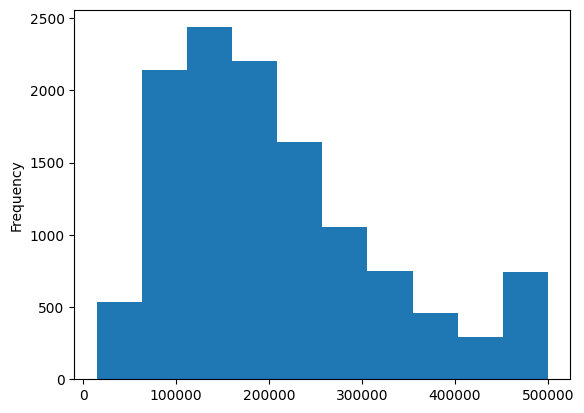

In [16]:
trainHouseValues.plot.hist()

Looking at this, let's say anything that's at or over the 75th percentile (~\$265,000) is "really expensive".

Now we need to binaryize the housing values.  We can do this by *mapping* the current housing values (in dollars) to 0 or 1 using the `Series.map()` function:

In [17]:
expensiveThreshold = trainHouseValues.quantile(0.75)

def houseValueToBinary(value):
    if value <= expensiveThreshold:
        return 0
    return 1

# TODO complete this
trainHouseValueClass = trainHouseValues.map(houseValueToBinary)
trainHouseValueClass.head()

11095    0
16206    0
1790     1
7452     0
17279    1
Name: house_value, dtype: int64

In [18]:
trainHouseValues.head()

11095     92300.0
16206    214500.0
1790     268600.0
7452     185200.0
17279    487500.0
Name: house_value, dtype: float64

Now we do that for our development and test sets as well.

In [19]:
devHouseValueClass = devHouseValues.map(houseValueToBinary)
testHouseValueClass = testHouseValues.map(houseValueToBinary)

## k-Nearest Neighbors

The next step is to train the model. This part looks a lot like linear regression; the only difference will be the name of the class and we'll use the binarized house values. Let's train a kNN model onall the features.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# For binary classification.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Due to a warning that KNeighborsClassifier will output when you use DataFrames,
# we're converting our feature DataFrames to numpy arrays:
modelKnn = KNeighborsClassifier(5) # use k=5
modelKnn.fit(trainFeaturesScaled.values, trainHouseValueClass)
devPredictedClass = modelKnn.predict(devFeaturesScaled.values)
devPredictedProbs = modelKnn.predict_proba(devFeaturesScaled.values)


print(f'Accuracy: {accuracy_score(devHouseValueClass, devPredictedClass)}')
print(f'Precision: {precision_score(devHouseValueClass, devPredictedClass)}')
print(f'Recall: {recall_score(devHouseValueClass, devPredictedClass)}')
print(f'F1: {f1_score(devHouseValueClass, devPredictedClass)}')
print(f'AUC: {roc_auc_score(devHouseValueClass, devPredictedProbs[:,1])}')

Accuracy: 0.8534377293858576
Precision: 0.7533742331288343
Recall: 0.6067193675889329
F1: 0.6721401204159825
AUC: 0.877533661107362


## Logistic regression

Now let's try  logistic regression.

In [21]:
from sklearn.linear_model import LogisticRegression

modelBinary = LogisticRegression()
modelBinary.fit(trainFeaturesScaled, trainHouseValueClass)

LogisticRegression()

In [22]:
trainFeaturesScaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11095,0.304781,0.575983,0.960784,0.042398,0.089708,0.037392,0.090162,0.056496
16206,0.664343,0.100956,0.313725,0.056717,0.059752,0.029880,0.071682,0.258279
1790,0.594622,0.157279,0.862745,0.053309,0.078112,0.037476,0.089602,0.238728
7452,0.637450,0.141339,0.666667,0.047103,0.061524,0.031085,0.070935,0.274376
17279,0.593625,0.134963,0.666667,0.025586,0.026413,0.010792,0.030987,0.226059
...,...,...,...,...,...,...,...,...
8340,0.429283,0.671626,0.294118,0.068823,0.077307,0.019789,0.048535,0.226838
13518,0.592629,0.141339,0.764706,0.042652,0.059752,0.019985,0.071682,0.409312
11452,0.627490,0.124336,0.470588,0.105499,0.091641,0.039747,0.101923,0.574351
14737,0.586653,0.155154,0.745098,0.015565,0.027863,0.014912,0.029494,0.127881


In [23]:
# What are these?

print(
    modelBinary.coef_,
    modelBinary.intercept_
)

print(f'{"intercept":>20}: {modelBinary.intercept_[0]:>15.5f}')
for coef,feature in zip(modelBinary.coef_[0], featureNames):
    print(f'{feature:>20}: {coef:>15.5f}')
print()

[[-10.67166066  -9.93825284   2.14547848  -1.41410329   4.83102264
   -8.01988781   2.86186805  13.47334256]] [2.04174196]
           intercept:         2.04174
           longitude:       -10.67166
            latitude:        -9.93825
  housing_median_age:         2.14548
         total_rooms:        -1.41410
      total_bedrooms:         4.83102
          population:        -8.01989
          households:         2.86187
       median_income:        13.47334



In [24]:
# Make predictions on the development set.

# Predict the class (0 or 1).
devPredictedClass = modelBinary.predict(devFeaturesScaled)

# Returns the raw probability of the 0 and 1 class. This is needed for some measures, like AUC.
devPredictedProbs = modelBinary.predict_proba(devFeaturesScaled)
devPredictedProbs

array([[0.70411851, 0.29588149],
       [0.47101765, 0.52898235],
       [0.97434207, 0.02565793],
       ...,
       [0.7263454 , 0.2736546 ],
       [0.84516939, 0.15483061],
       [0.99220414, 0.00779586]], shape=(4087, 2))

In [25]:
devPredictedProbs[:,1]
devPredictedProbs[2,:] # all columns, but just row index 3
devPredictedProbs[2][:]


array([0.97434207, 0.02565793])

Evaluation is also similar, but different metrics. Area under the receiver operator characteristic curve (`roc_auc_score`) requires the predictions—what is the `[:,1]` bit about?

In [26]:


print(f'Accuracy: {accuracy_score(devHouseValueClass, devPredictedClass)}')
print(f'Precision: {precision_score(devHouseValueClass, devPredictedClass)}')
print(f'Recall: {recall_score(devHouseValueClass, devPredictedClass)}')
print(f'F1: {f1_score(devHouseValueClass, devPredictedClass)}')
print(f'AUC: {roc_auc_score(devHouseValueClass, devPredictedProbs[:,1])}')

Accuracy: 0.8509909469048201
Precision: 0.7810320781032078
Recall: 0.5533596837944664
F1: 0.6477732793522267
AUC: 0.8910279893312767


**Is our model any good?**

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(trainFeaturesScaled.values, trainHouseValueClass)
devPredictedClass = modelDT.predict(devFeaturesScaled.values)
devPredictedProbs = modelDT.predict_proba(devFeaturesScaled.values)


print(f'Accuracy: {accuracy_score(devHouseValueClass, devPredictedClass)}')
print(f'Precision: {precision_score(devHouseValueClass, devPredictedClass)}')
print(f'Recall: {recall_score(devHouseValueClass, devPredictedClass)}')
print(f'F1: {f1_score(devHouseValueClass, devPredictedClass)}')
print(f'AUC: {roc_auc_score(devHouseValueClass, devPredictedProbs[:,1])}')

Accuracy: 0.8622461463175923
Precision: 0.71648987463838
Recall: 0.7341897233201581
F1: 0.7252318204001952
AUC: 0.8192899836112987


## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# TODO

# Balancing datasets

In classifictation, balanced datasets provide an equal number of observations corresponding to each class. If you have a dataset where there is an imbalance, there are several ways you can rectify it. A couple of simple approaches are:

  * oversample observations of the class that is underrepresented
  * undersample observations of the class that is overrepresented
  * create synthetic observations of the class that is underrepresented
  * some combination of these
  
The first is pretty simple and doesn't throw away data. It works as follows. Assume the underrepresented class is A and the overrepresented class is B. Let $n$ be the number of observations of class A and $m$ be the number of observations of class B. $m-n$ times we will randomly choose one of the $n$ observations of class A and add them to a separat set. The same observation can be picked multiple times (this is called random sampling with replacement). We now combine the $n$ original observations of class A, the $m-n$ duplicated observations, and the $m$ observations of class B to get our new balanced dataset.

There are libraries that can do this for you, but it's easy enough to write:

<Axes: ylabel='Frequency'>

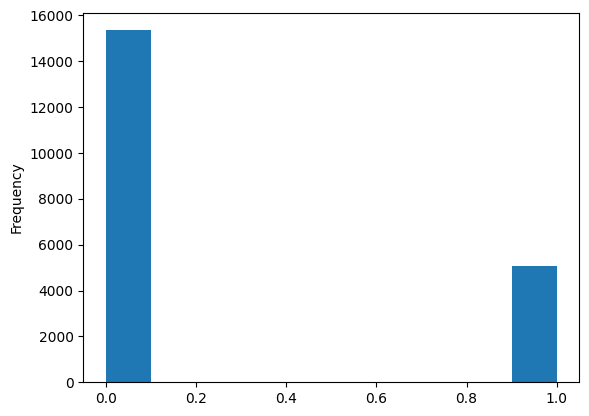

In [29]:
import pandas as pd

housingDF = pd.read_csv('../data/housing-all.csv')
housingDF['is_really_expensive'] = housingDF['house_value'].map(lambda x: 1 if x >= expensiveThreshold else 0)
housingDF['is_really_expensive'].plot.hist()

In [30]:
# We can see that the 1.0 class is the underrepresented class, so we'll oversample that.

diff = len(housingDF[housingDF['is_really_expensive'] == 0]) - len(housingDF[housingDF['is_really_expensive'] == 1]) 
newSample = housingDF[housingDF['is_really_expensive'] == 1].sample(n=diff, replace=True)
newSample.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_value,is_really_expensive
count,10273.000000,10273.000000,10273.000000,10273.000000,10273.000000,10273.000000,10273.000000,10273.000000,10273.000000,10273.0
mean,-119.829625,35.405989,30.698238,2998.885428,551.406405,1317.979363,519.083715,5.681079,373125.440086,1.0
std,2.022300,1.874155,13.319085,2327.291679,425.726627,1021.832145,390.892159,2.338696,81572.366881,0.0
min,-123.810000,32.630000,2.000000,8.000000,1.000000,3.000000,1.000000,0.499900,265500.000000,1.0
25%,-122.090000,33.890000,20.000000,1722.000000,305.000000,748.000000,292.000000,4.038000,300600.000000,1.0
50%,-118.490000,34.170000,31.000000,2485.000000,449.000000,1088.000000,426.000000,5.392500,350900.000000,1.0
75%,-118.150000,37.510000,40.000000,3567.000000,665.000000,1598.000000,626.000000,6.800400,450000.000000,1.0
max,-114.620000,39.340000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,500001.000000,1.0


<Axes: ylabel='Frequency'>

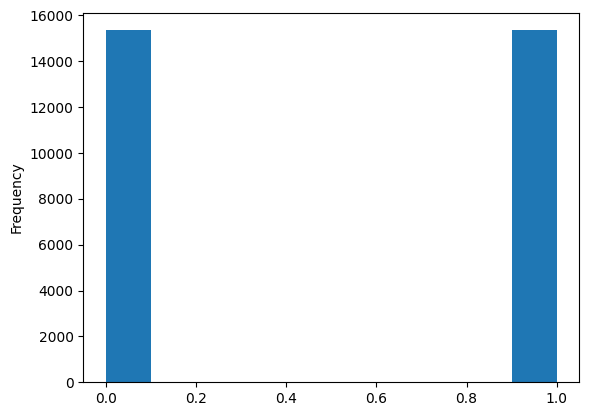

In [31]:
housingDFBalanced = pd.concat([housingDF, newSample])
housingDFBalanced['is_really_expensive'].plot.hist()

Once you've made a balanced dataset, you can go ahead and make your training and development splits.

# Next steps

There are LOTS of other classification and regression models out there—check out [the Scikit Learn website](https://scikit-learn.org/stable/index.html) for more. They follow pretty similar patterns. Each algorithm also has several parameters you can adjust, so be sure to read the documentation pages and guides to find out how to tweak them.

Scikit Learn also has a construct called *pipelines*, which I haven't gone over in this notebook. You can find out more about those [here](https://scikit-learn.org/stable/modules/compose.html#combining-estimators).
